In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

base_dir = '/Volumes/diedrichsen_data$/data/FunctionalFusion'
if not Path(base_dir).exists():
    base_dir = '/srv/diedrichsen/data/FunctionalFusion'

eval_dir = base_dir + '/Models/Evaluation_01'

This notebook plots the cosine error evaluation of the different parcellations

In [2]:
# Load evaluation results
D = pd.read_csv(eval_dir + '/eval_prederr_asym_K-12.tsv', sep='\t')
D

,Unnamed: 0,model_name,atlas,K,train_data,train_loglik,test_data,indivtrain_ind,indivtrain_val,subj_num,coserr_group,coserr_floor,coserr_ind2
0,0,asym_Md,MNISymC3,12,['Mdtb'],1.123265e+07,Mdtb,half,1,0,0.539449,0.400020,0.456964
1,1,asym_Md,MNISymC3,12,['Mdtb'],1.123265e+07,Mdtb,half,1,1,0.562941,0.391480,0.435719
2,2,asym_Md,MNISymC3,12,['Mdtb'],1.123265e+07,Mdtb,half,1,2,0.653197,0.527698,0.609584
3,3,asym_Md,MNISymC3,12,['Mdtb'],1.123265e+07,Mdtb,half,1,3,0.386681,0.244940,0.259334
4,4,asym_Md,MNISymC3,12,['Mdtb'],1.123265e+07,Mdtb,half,1,4,0.400372,0.293004,0.351498
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,asym_MdPoNiIb,MNISymC3,12,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc'],1.504276e+08,Ibc,half,2,7,2.763196,2.348827,2.553758
496,496,asym_MdPoNiIb,MNISymC3,12,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc'],1.504276e+08,Ibc,half,2,8,2.691971,2.436116,2.642535
497,497,asym_MdPoNiIb,MNISymC3,12,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc'],1.504276e+08,Ibc,half,2,9,2.427532,2.222073,2.342858
498,498,asym_MdPoNiIb,MNISymC3,12,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc'],1.504276e+08,Ibc,half,2,10,2.615279,2.403103,2.499023


<AxesSubplot:xlabel='test_data', ylabel='coserr_ind2'>

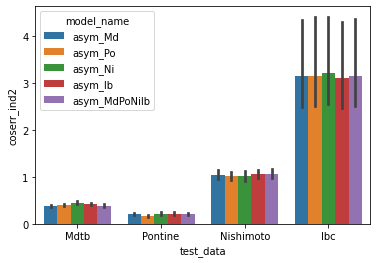

In [7]:
sb.barplot(data=D,x='test_data',y='coserr_ind2',hue='model_name')

In [4]:

sb.barplot(data=coserror, x="test_data", y="coserr_ind2", hue="train_data")

coserror.groupby('train_data').coserr_ind2.describe()


NameError: name 'coserror' is not defined

,count,mean,std,min,25%,50%,75%,max
train_data,,,,,,,,
['Mdtb' 'Pontine' 'Nishimoto'],96.0,0.089375,0.029458,0.048478,0.068848,0.079233,0.104391,0.172057
['Mdtb'],96.0,0.082758,0.027651,0.046394,0.062884,0.073993,0.094756,0.162756
['Nishimoto'],96.0,0.101531,0.033831,0.053949,0.077326,0.089594,0.121194,0.195783
['Pontine'],96.0,0.096502,0.031647,0.052595,0.072377,0.085594,0.115699,0.177897


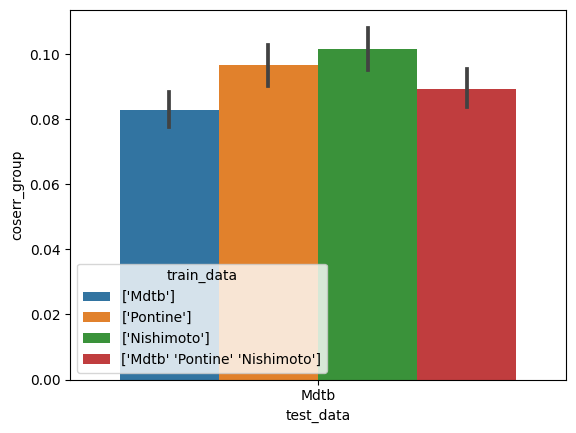

In [23]:
sb.barplot(data=coserror, x="test_data", y="coserr_group", hue="train_data")

coserror.groupby('train_data').coserr_group.describe()
